In [1]:
# Importing Required liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
#  Importing dataset
ai = pd.read_csv(r"C:\Users\SREEDHAR\Documents\Data science\ML projects\Automobile_insurance_fraud.csv")

In [3]:
# Printing 5 rows of  the dataset
ai.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
ai.shape

(1000, 40)

In [5]:
# Checking datatypes of column
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# Checking for null values

ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
ai.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Our last column _c39 have all null values hence dropping the column

In [8]:
ai.drop('_c39', axis = 1 , inplace = True)

In [9]:
# Checking missing values 
for column in ai:
    if np.dtype(ai[column])=='O':
        print(ai[column].value_counts())
        
    else:
        continue
       
       
    


01-01-2006    3
28-04-1992    3
05-08-1992    3
30-08-1993    2
14-07-1997    2
             ..
30-03-1999    1
17-03-2010    1
08-02-2009    1
06-08-1994    1
14-02-1994    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

we dont see any Nans present but we do '?' present in some columns

In [10]:
ai.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [11]:
ai['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [12]:
ai = pd.read_csv(r"C:\Users\SREEDHAR\Documents\Data science\ML projects\Automobile_insurance_fraud.csv", 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [13]:
ai.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,0,0,NaN,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NaN,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


In [14]:
ai.isnull().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [15]:
ai['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [16]:
ai['collision_type'].fillna(ai['collision_type'].value_counts().index[0], inplace = True)
ai['property_damage'].fillna(ai['property_damage'].value_counts().index[0], inplace = True)
ai['police_report_available'].fillna(ai['police_report_available'].value_counts().index[0], inplace = True)

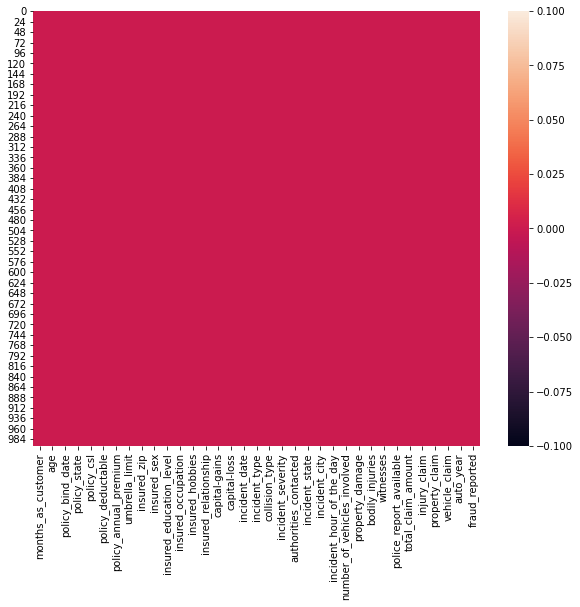

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(ai.isnull())
plt.show()

In [18]:
ai.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

In [19]:
#dropping those 2 date columns
ai['policy_bind_day'] = pd.to_datetime(ai.policy_bind_date, format = '%d/%m/%Y').dt.day
ai['policy_bind_month'] = pd.to_datetime(ai.policy_bind_date, format = '%d/%m/%Y').dt.month
ai['policy_bind_year'] = pd.to_datetime(ai.policy_bind_date, format = '%d/%m/%Y').dt.year

In [20]:

ai['incident_day'] = pd.to_datetime(ai.incident_date, format = '%d/%m/%Y').dt.day
ai['incident_month'] = pd.to_datetime(ai.incident_date, format = '%d/%m/%Y').dt.month

In [21]:
ai.drop(['policy_bind_date', 'incident_date'], axis = 1 , inplace = True)

In [22]:
ai

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,2004,Y,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,2007,Y,27,6,2006,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,2007,N,6,9,2000,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,2014,Y,25,5,1990,10,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,2009,N,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,2006,N,16,7,1991,22,2
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,2015,N,5,1,2014,24,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,1996,N,17,2,2003,23,1
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,1998,N,18,11,2011,26,2


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

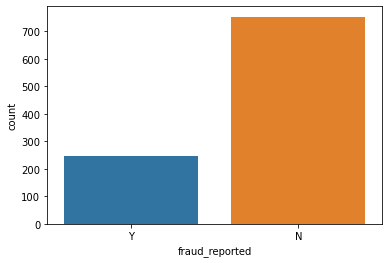

In [23]:
sns.countplot(x = 'fraud_reported', data = ai)

We have more number of cases where fraud was not reported 

In [24]:
ai['age_bins'] = pd.cut(ai.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [25]:
age_vs_fraud = pd.crosstab(ai['age_bins'], ai['fraud_reported'])

In [26]:
age_vs_fraud

fraud_reported,N,Y
age_bins,,
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


<AxesSubplot:xlabel='age_bins'>

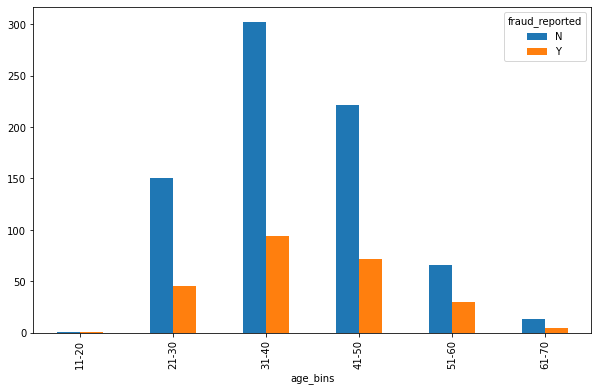

In [27]:
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

Most of the frauds are reported in age limit 31 to 50

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

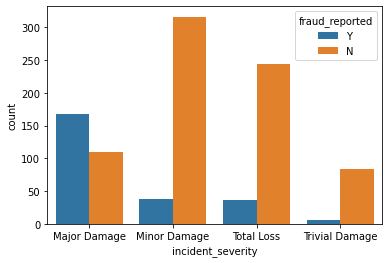

In [28]:
sns.countplot(x = 'incident_severity',hue = 'fraud_reported', data = ai )

More no.of fraud cases reported are with in Major damage cases when compared to minor and Trivial damage

In [29]:
ai.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month', 'age_bins'],
      dtype='object')

In [30]:
ai['months_as_customer'].max()


479

In [31]:
cust = pd.cut(ai.months_as_customer, bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], include_lowest = True, labels = ['0-50','50-100','100-150','150-200', '200-250', '250-300', '300-350','350-400','400-450','450-500'])

In [32]:
cust_vs_fraud = pd.crosstab(cust, ai['fraud_reported'])

In [33]:
cust_vs_fraud

fraud_reported,N,Y
months_as_customer,,
0-50,68,23
50-100,86,26
100-150,127,36
150-200,98,39
200-250,119,34
250-300,135,39
300-350,39,14
350-400,27,14
400-450,36,14


<AxesSubplot:xlabel='months_as_customer'>

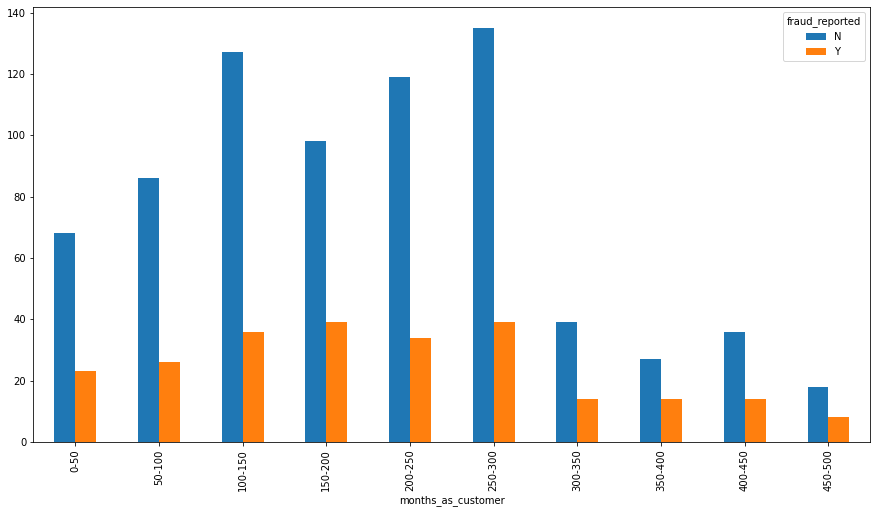

In [34]:
cust_vs_fraud.plot(kind = 'bar', figsize = (15,8))

Most of the frauds are reported from the  customers who are 150-300 months old customers

In [35]:
print(ai.total_claim_amount.min())
print(ai.total_claim_amount.max())

100
114920


In [36]:
claim_bins = pd.cut(ai.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300']) 

In [37]:
total_claim_vs_fraud = pd.crosstab(claim_bins, ai.fraud_reported)

In [38]:
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_amount,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


<AxesSubplot:xlabel='total_claim_amount'>

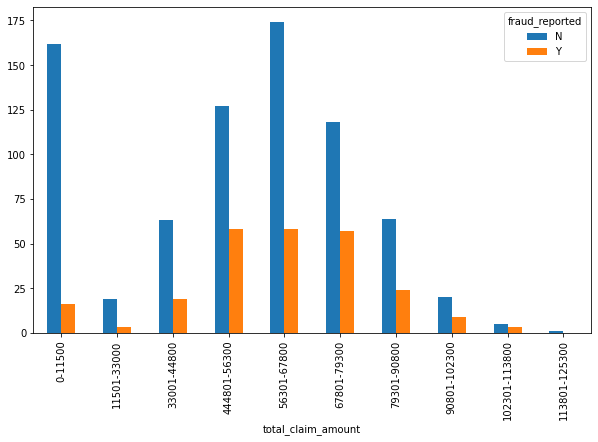

In [39]:
total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))

High no.of claims are between price range 44801 to 79300 

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

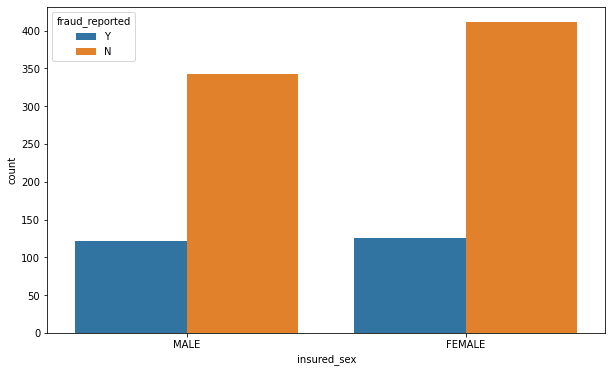

In [40]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'insured_sex', hue = 'fraud_reported', data = ai )

More likely to report the fraud are males

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

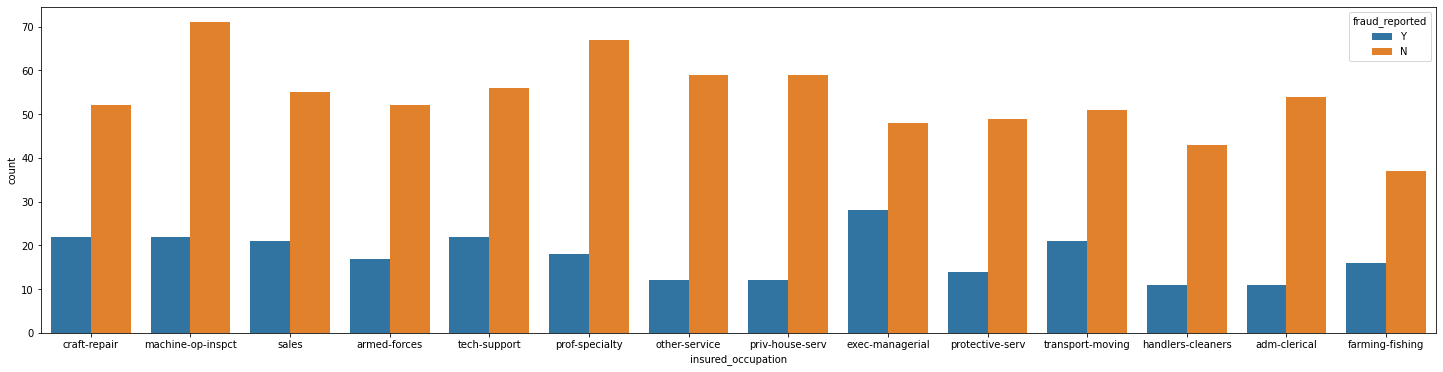

In [41]:
plt.figure(figsize = (25,6))
sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = ai )

percentage of fraud reporting is higher in exec-managerial and transport-moving occupation 

<AxesSubplot:xlabel='incident_type', ylabel='count'>

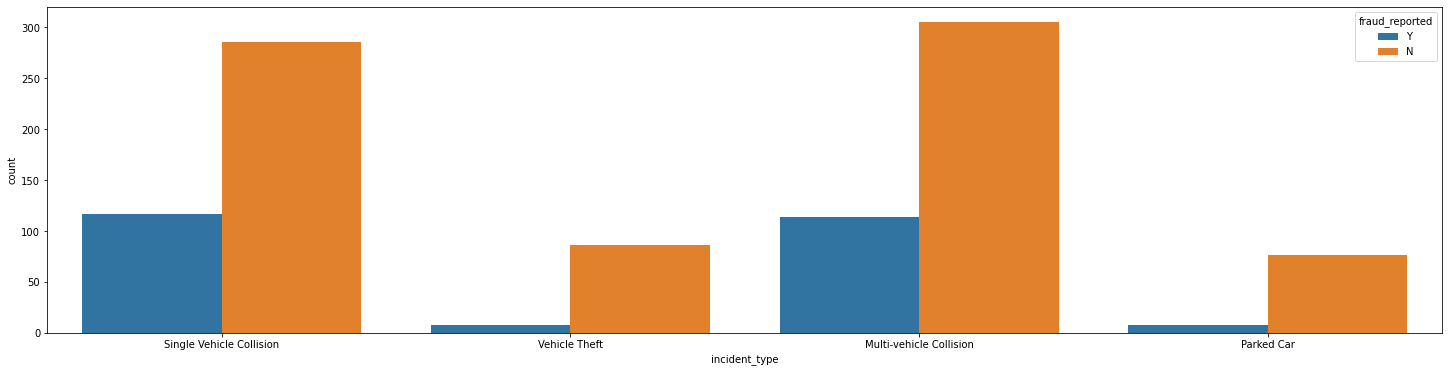

In [42]:

plt.figure(figsize = (25,6))
sns.countplot(x = 'incident_type', hue = 'fraud_reported', data = ai )

more frauds are reported for single vehicle collosion and there is less chance of fraud reporting of a parked car

<AxesSubplot:xlabel='collision_type', ylabel='count'>

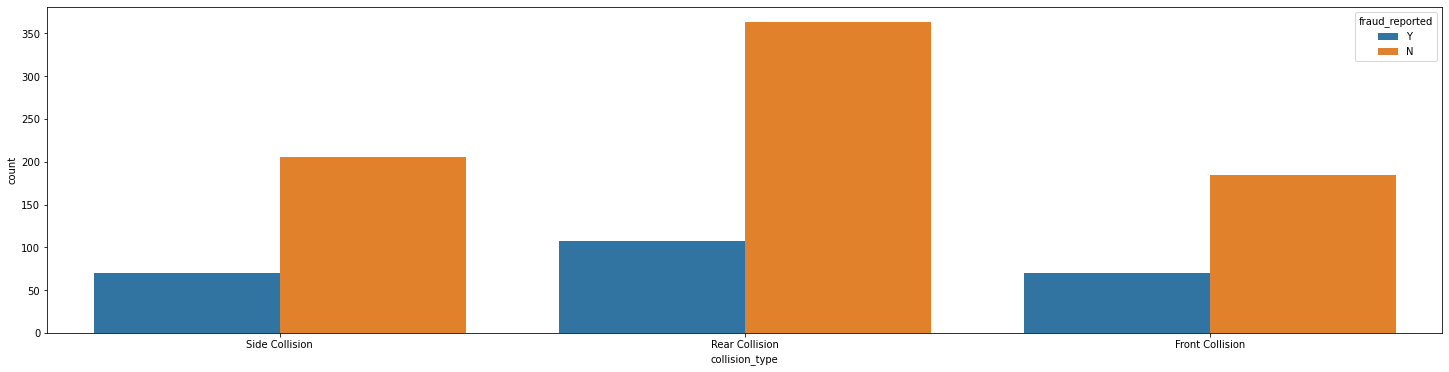

In [43]:

plt.figure(figsize = (25,6))
sns.countplot(x = 'collision_type', hue = 'fraud_reported', data = ai )

more frauds with rear collosion frauds reported being aware we have filled Nans in this columns, rear collision is more impactful in fraud report

In [44]:
ai.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month', 'age_bins'],
      dtype='object')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

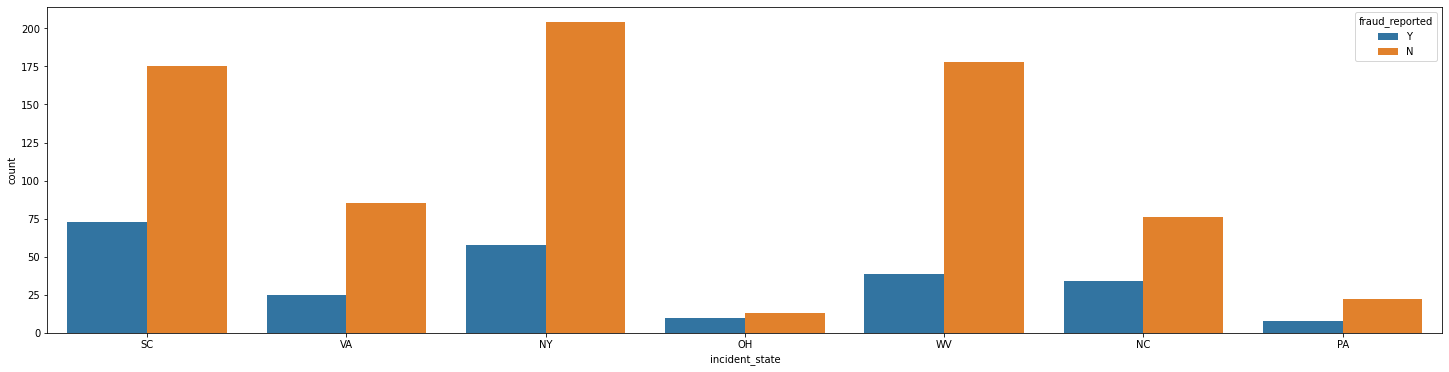

In [45]:
plt.figure(figsize = (25,6))
sns.countplot(x = 'incident_state', hue = 'fraud_reported', data = ai )

Percentage of fraud reported is higher in states SC and OH

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

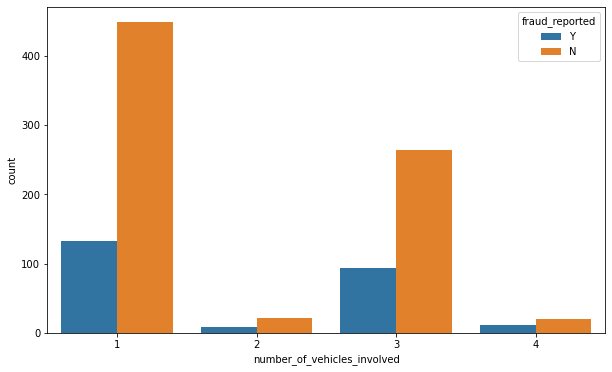

In [46]:

plt.figure(figsize = (10,6))
sns.countplot(x = 'number_of_vehicles_involved', hue = 'fraud_reported', data = ai )

above graph that number of fraud reported is more, when 2 or more vehicles are invloved 

<AxesSubplot:xlabel='property_damage', ylabel='count'>

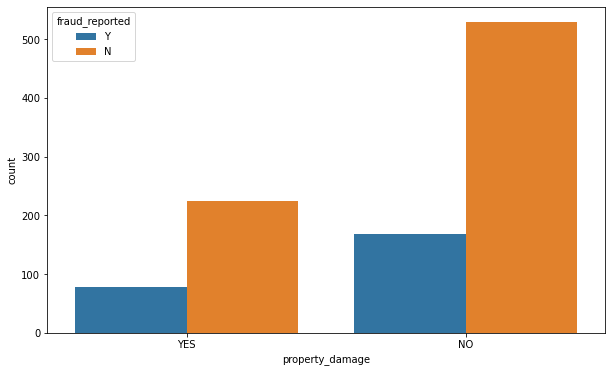

In [47]:

plt.figure(figsize = (10,6))
sns.countplot(x = 'property_damage', hue = 'fraud_reported', data = ai )

In case of property damage there are more chances of fraud to be reported

In [48]:
print(ai['injury_claim'].max())
print(ai['vehicle_claim'].max())
print(ai['property_claim'].max())

21450
79560
23670


In [49]:
veh_bins = pd.cut(ai.vehicle_claim, bins = [0,10000,20000,30000,40000,50000,60000,70000,80000 ], include_lowest = True, labels = ['0-10000','10000-20000','20000-30000','30000-40000', '40000-50000', '50000-60000', '60000-70000','70000-80000'])
inj_bins = pd.cut(ai.injury_claim, bins = [0, 3000, 6000, 9000, 12000,15000,18000, 21000, 24000 ], include_lowest = True, labels = ['0-3000','3000-6000','6000-9000','9000-12000', '12000-15000', '15000-18000', '18000-21000','21000-24000'])
prop_bins = pd.cut(ai.property_claim, bins = [0, 3000, 6000, 9000, 12000,15000,18000, 21000, 24000 ], include_lowest = True, labels = ['0-3000','3000-6000','6000-9000','9000-12000', '12000-15000', '15000-18000', '18000-21000','21000-24000']) 

In [50]:
veh_binsvs_fraud = pd.crosstab(veh_bins, ai.fraud_reported)
inj_binsvs_fraud = pd.crosstab(inj_bins, ai.fraud_reported)
prop_binsvs_fraud = pd.crosstab(prop_bins, ai.fraud_reported)

<AxesSubplot:xlabel='vehicle_claim'>

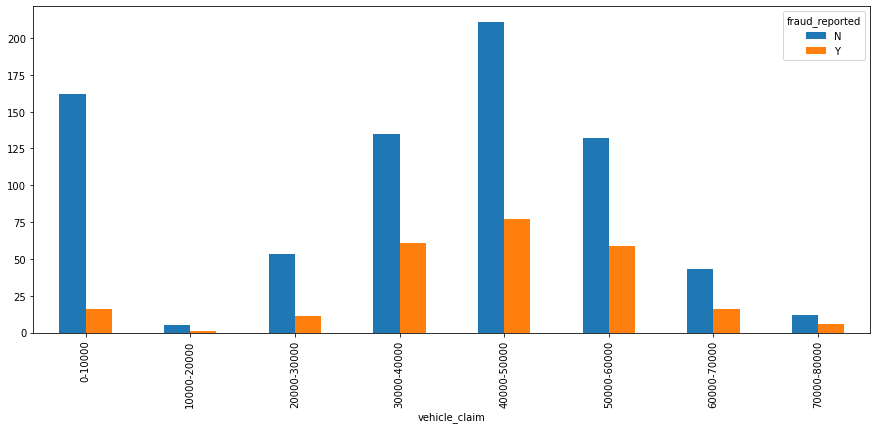

In [51]:
veh_binsvs_fraud.plot(kind = 'bar', figsize = (15,6))

More frauds are reported when vehicle was billed between 30000 to 60000

<AxesSubplot:xlabel='injury_claim'>

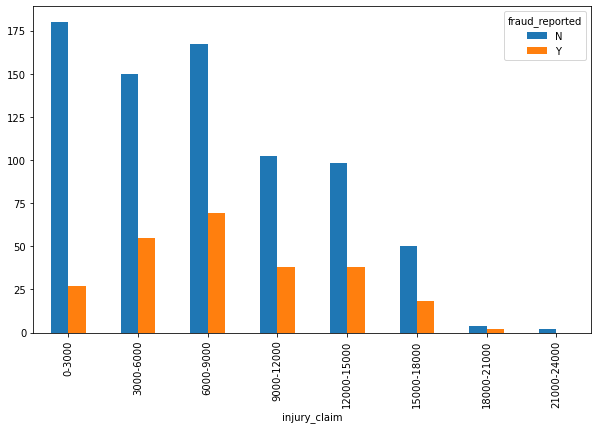

In [52]:
inj_binsvs_fraud.plot(kind = 'bar', figsize = (10,6))

More frauds are reported when Injury claim is between 3000 to 15000

<AxesSubplot:xlabel='property_claim'>

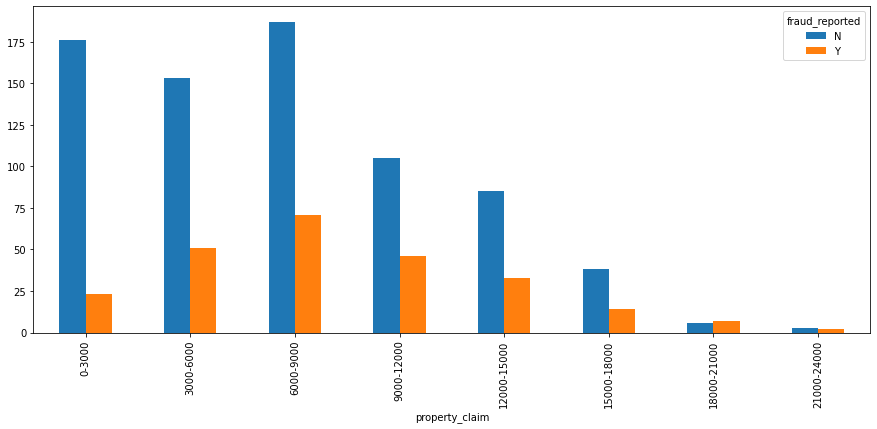

In [53]:
prop_binsvs_fraud.plot(kind = 'bar', figsize = (15,6))

Most frauds are reported when property claim is 3000 to 15000 

In [54]:
#dropping few columns
ai.drop(columns = ['policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage','age_bins', ], axis = 1, inplace = True)

In [55]:
ai.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,...,6510,13020,52080,2004,Y,17,10,2014,25,1
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,...,780,780,3510,2007,Y,27,6,2006,21,1
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,...,7700,3850,23100,2007,N,6,9,2000,22,2
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,...,6340,6340,50720,2014,Y,25,5,1990,10,1
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,...,1300,650,4550,2009,N,6,6,2014,17,2


In [56]:
#checking list of columns again
ai.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'collision_type', 'incident_severity',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month'],
      dtype='object')

In [57]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   collision_type               1000 non-null   object 
 10  incident_severity            1000 non-null   object 
 11  incident_hour_of_the_day     1000 non-null   int64  
 12  number_of_vehicles_involved  1000 non-null   int64  
 13  bodily_injuries    

In [58]:

for column in ai:
    if np.dtype(ai[column])=='O':
        print(ai[column].value_counts())
        
    else:
        continue

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
NO     686
YES    314
Name: police_report_available, dtype: int64
N    753
Y    247
Name: fraud_reported, dtype: int64


In [59]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

ai['policy_state'] = Le.fit_transform(ai['policy_state'])
ai['insured_sex'] = Le.fit_transform(ai['insured_sex'])
ai['collision_type'] = Le.fit_transform(ai['collision_type'])
ai['incident_severity'] = Le.fit_transform(ai['incident_severity'])
ai['police_report_available'] = Le.fit_transform(ai['police_report_available'])
ai['fraud_reported'] = Le.fit_transform(ai['fraud_reported'])

In [60]:
#checking correlation
ai.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,0.006399,0.020209,-0.072787,...,0.065329,0.034940,0.061013,-0.000292,0.020544,0.054809,-0.001559,-0.048276,-0.001455,-0.042826
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,-0.007075,0.007368,-0.075642,...,0.075522,0.060898,0.062588,0.001354,0.012143,0.056776,0.008357,-0.037444,0.003697,-0.037058
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,0.074551,-0.030338,0.052438,...,-0.046290,0.008406,0.001425,0.002114,0.029432,0.011178,0.046871,-0.007276,0.025572,0.018531
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.035212,-0.023544,-0.053912,...,0.039107,0.064792,0.005269,0.026105,0.014817,-0.000265,-0.025020,-0.049598,-0.022701,-0.026416
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.013738,0.023547,0.036556,...,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,-0.037933,-0.002480,0.001249,0.028797,-0.046097
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.047268,-0.024056,0.010041,...,-0.045412,-0.023790,-0.038584,0.009893,0.058622,-0.023361,-0.045871,0.048008,-0.009974,-0.002576
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,-0.020494,-0.021705,-0.014293,...,0.000924,-0.014868,-0.029609,-0.028247,0.030873,0.039769,-0.001042,-0.032891,0.001924,-0.025471
capital-gains,0.006399,-0.007075,0.074551,0.035212,-0.013738,-0.047268,-0.020494,1.000000,-0.046904,-0.006170,...,0.025934,-0.000779,0.015836,0.031398,-0.019173,-0.004664,0.021193,0.041249,0.031922,-0.037097
capital-loss,0.020209,0.007368,-0.030338,-0.023544,0.023547,-0.024056,-0.021705,-0.046904,1.000000,0.041494,...,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,-0.025983,-0.028124,-0.026420,-0.009696,0.005949
collision_type,-0.072787,-0.075642,0.052438,-0.053912,0.036556,0.010041,-0.014293,-0.006170,0.041494,1.000000,...,-0.024996,-0.003844,-0.009127,-0.001204,-0.017315,-0.001539,0.012847,0.026098,0.046319,0.010733


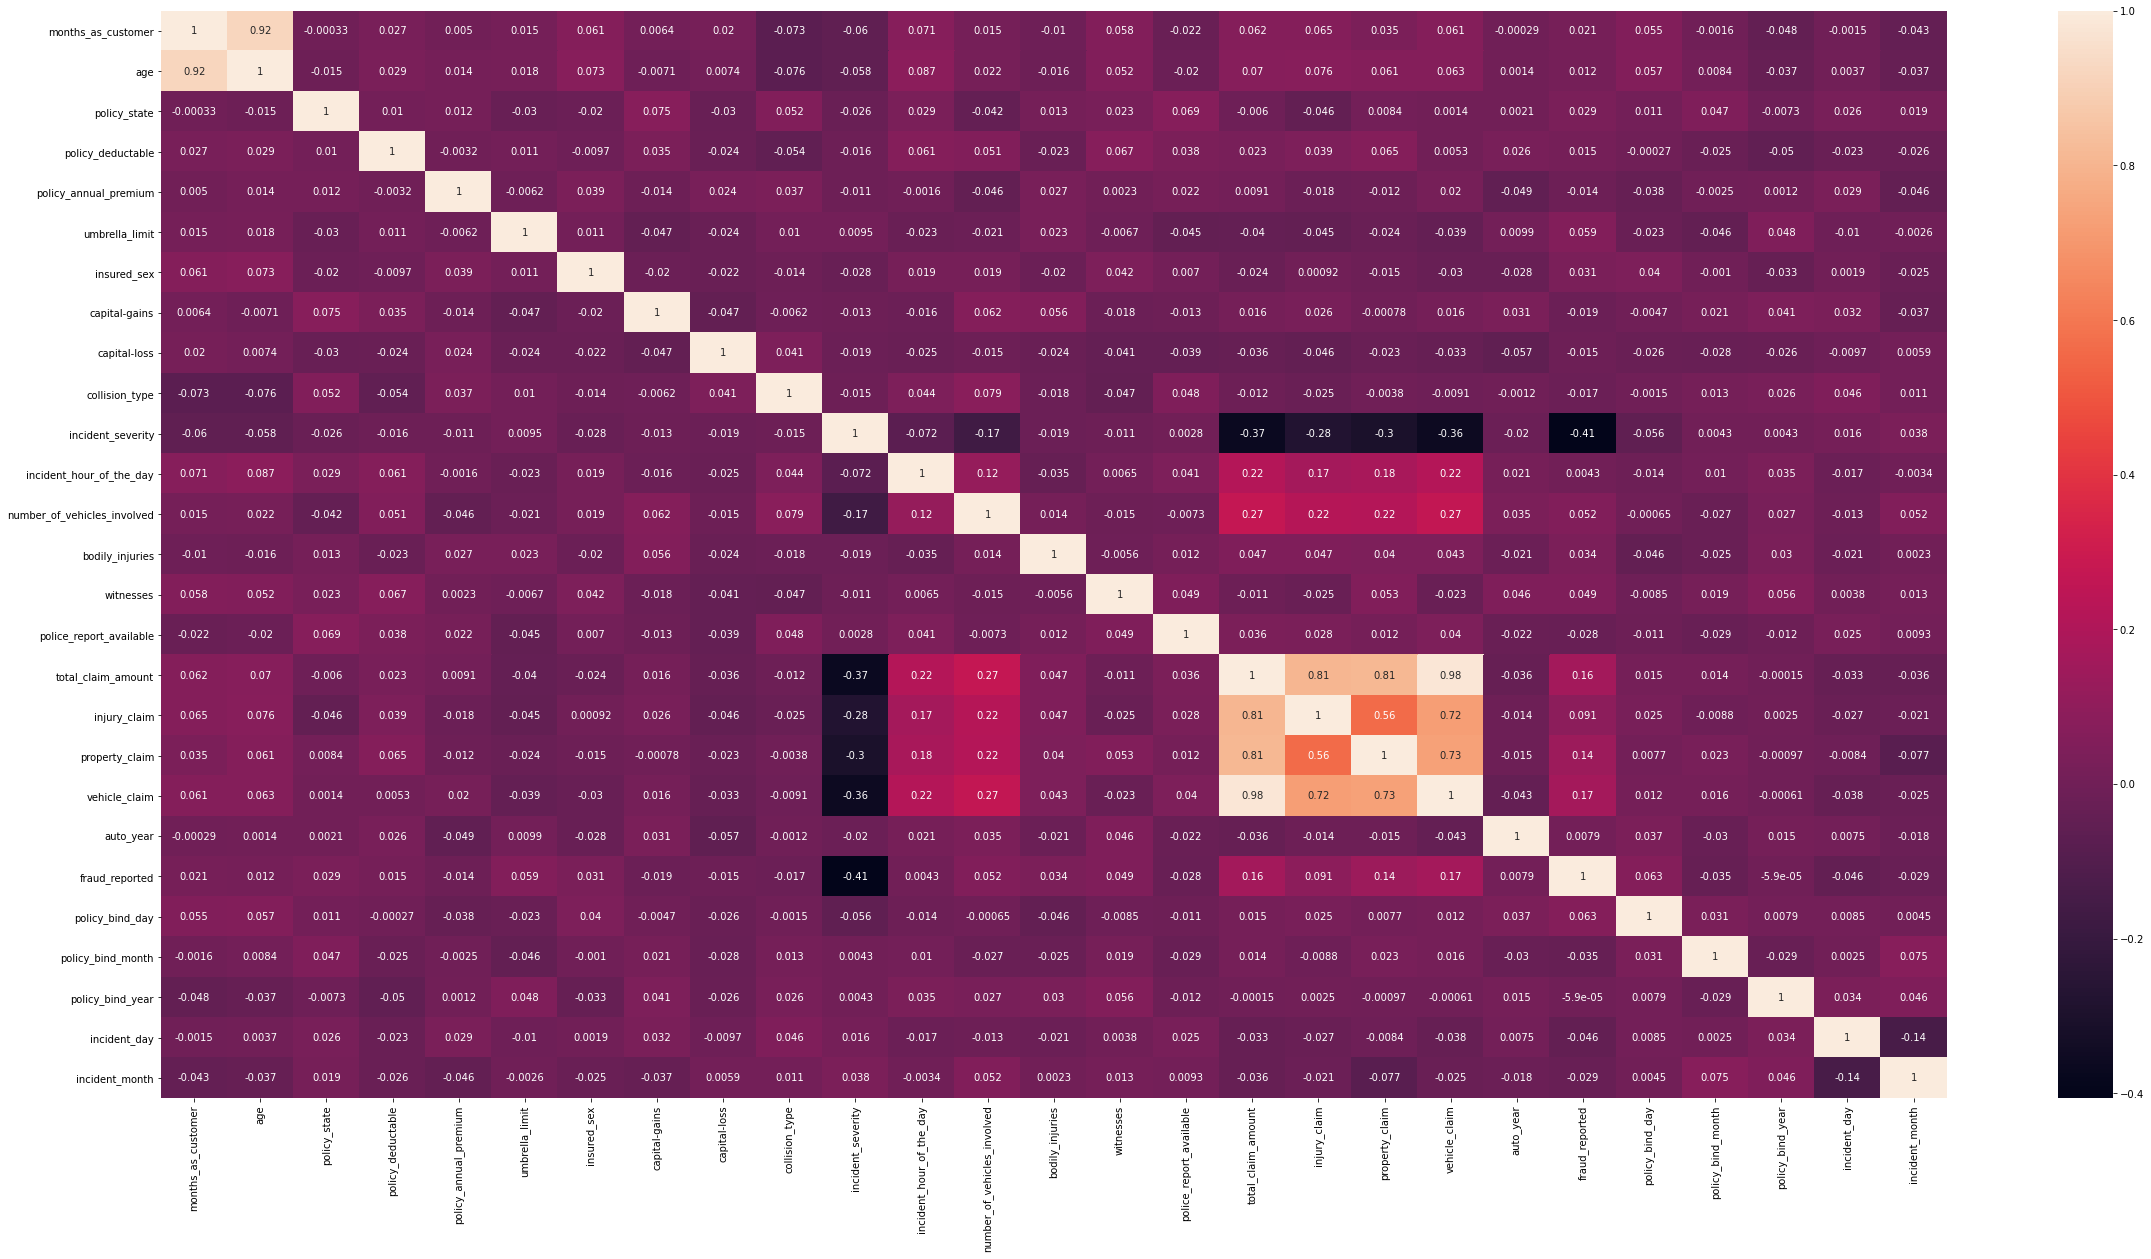

In [61]:
#heatmap
plt.figure(figsize = (40,20))
sns.heatmap(ai.corr(), annot=True)
plt.show()

1.Heatmap analysis shows that target column has strong negative correlation with the incident_survey column
2.Total claim has 98% correlation with the vehicle claim .
3.92 % correlation exists between months as customer and age

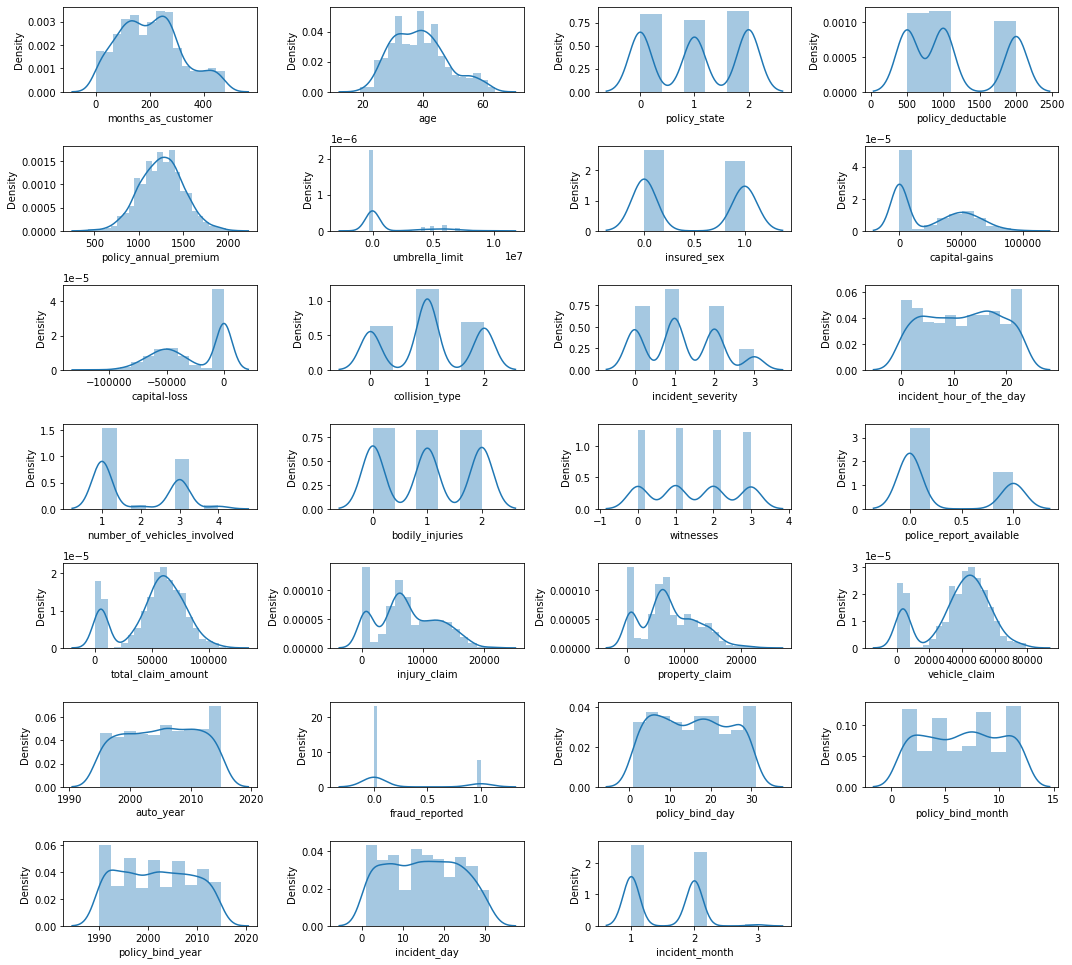

In [62]:
# Checking data Distribution

plt.figure(figsize = (15,15), facecolor = 'white')

plotnum = 1

for column in ai:
    if plotnum <=27:
        ax = plt.subplot(8,4, plotnum)
        sns.distplot(ai[column])
        plt.xlabel(column)
        
    plotnum+=1
    
plt.tight_layout()

Excepting our categorical columns our data is not normally distributed and contains skewness which needs to be removed before model building

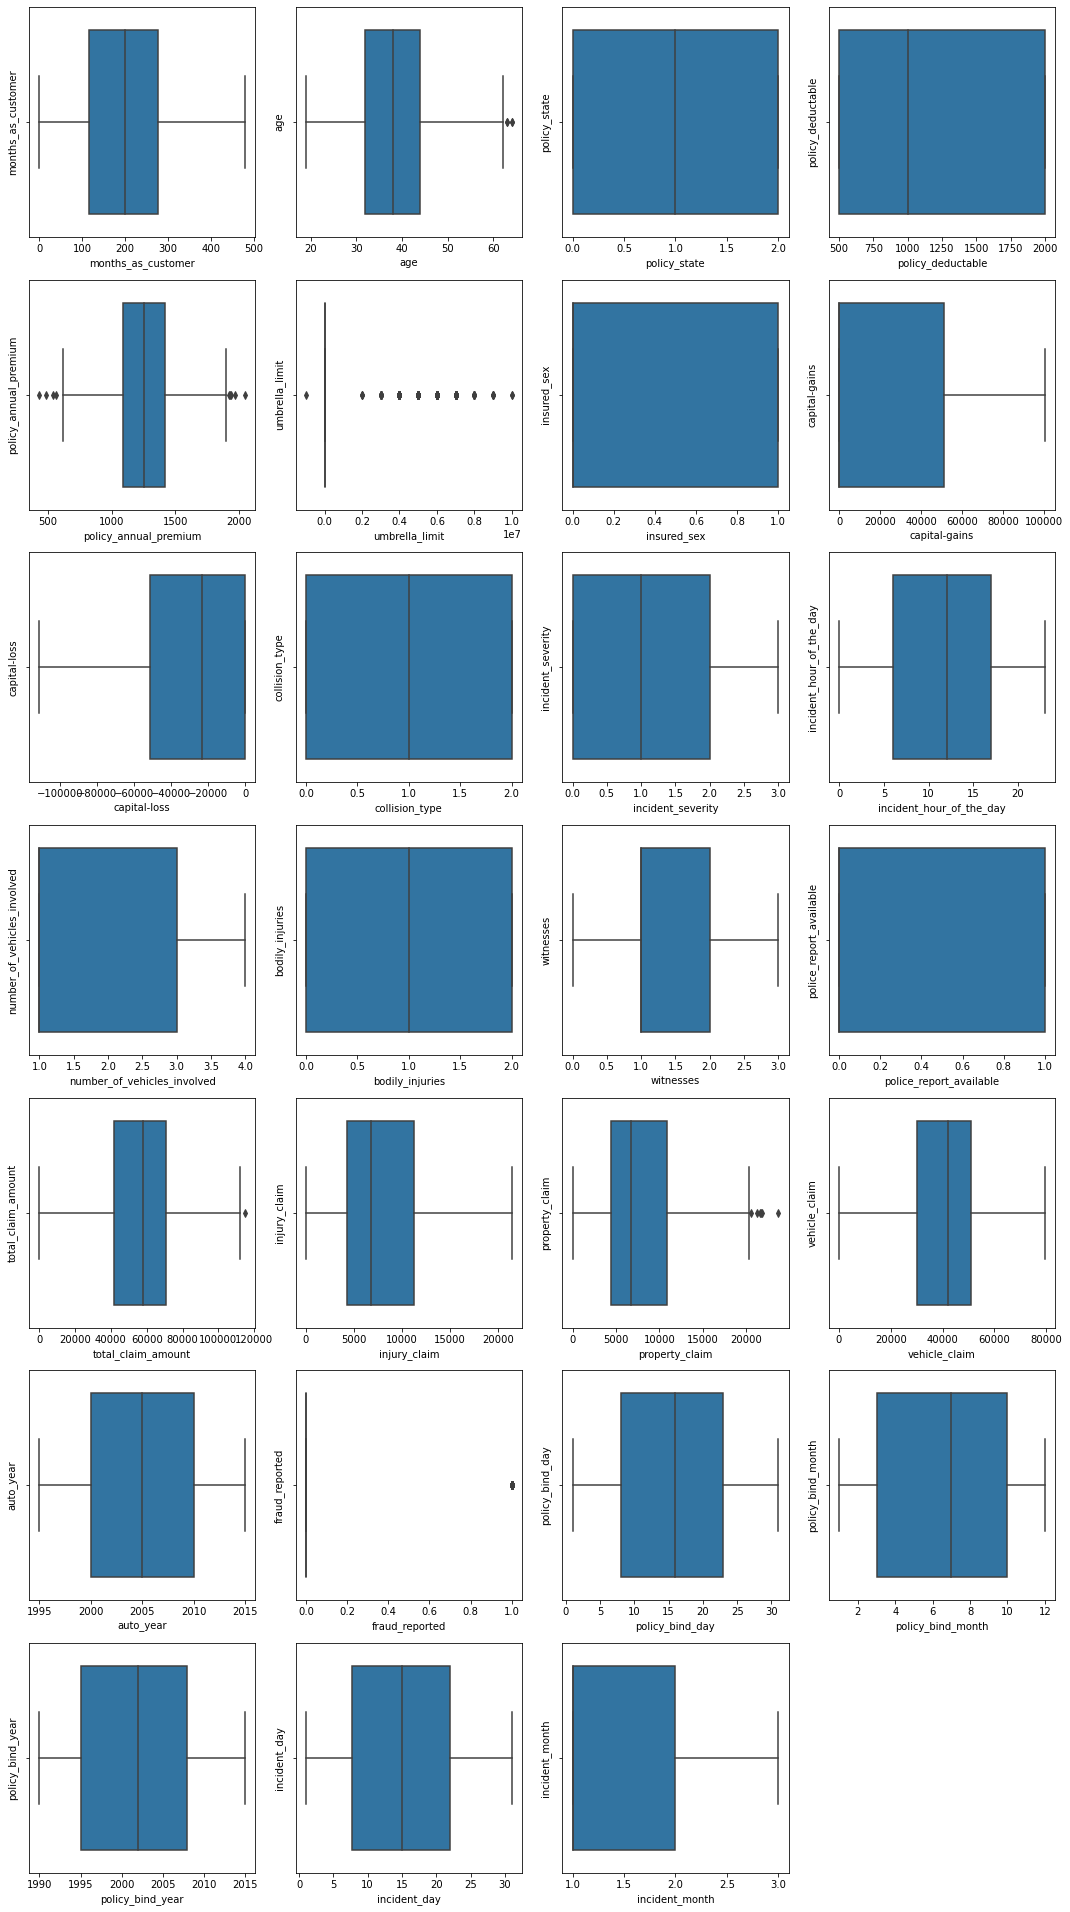

In [63]:
#Checking for outliers

plt.figure(figsize = (15,30))
graphs = 1

for column in ai:
    if graphs <=27:
        ax = plt.subplot(8,4,graphs)
        sns.boxplot(ai[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graphs+=1   
plt.tight_layout()

In [64]:
ai.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'collision_type', 'incident_severity',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month'],
      dtype='object')

In [65]:
ai.shape

(1000, 27)

In [66]:
# Removing outliers with Z-score


                 
from scipy.stats import zscore

z_score = zscore(ai[['umbrella_limit','policy_annual_premium',]])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

ai= ai[filtering_entry]

In [67]:
ai.shape

(982, 27)

In [68]:
# Checking data lost

print ('Data lost = ', ((1000-982)/1000)*100 , '%')

Data lost =  1.7999999999999998 %


In [69]:
x = ai.drop('fraud_reported', axis = 1)
y = ai['fraud_reported']

In [70]:
# Data Scaling Using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [71]:
# Finding best random state for data splitting

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [72]:
maxAcc = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy is=',maxAcc, "@Random state=",macRS)    

Best Accuracy is= 0.8211382113821138 @Random state= 337


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=337)

In [74]:
# Importing SMOTE for OverSampling
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()

ove_smp = SMOTE(0.80)

x_train_ns, y_train_ns = ove_smp.fit_resample(x_train,y_train)

print ("number of samples before fit{}".format(Counter(y_train))) 
print ("number of samples after fit{}".format(Counter(y_train_ns)))   


number of samples before fitCounter({0: 543, 1: 193})
number of samples after fitCounter({0: 543, 1: 434})


In [75]:
y_train = y_train_ns
x_train = x_train_ns

In [76]:
#ModeL building with Logistic Regression
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy is",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))


Accuracy is 74.39024390243902
[[173  26]
 [ 37  10]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       199
           1       0.28      0.21      0.24        47

    accuracy                           0.74       246
   macro avg       0.55      0.54      0.54       246
weighted avg       0.72      0.74      0.73       246



In [77]:
# ModeL building with Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy is",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy is 0.7113821138211383
[[150  49]
 [ 22  25]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       199
           1       0.34      0.53      0.41        47

    accuracy                           0.71       246
   macro avg       0.60      0.64      0.61       246
weighted avg       0.77      0.71      0.73       246



In [78]:
#ModeL building with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accuracy is',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is 81.70731707317073
[[175  24]
 [ 21  26]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       199
           1       0.52      0.55      0.54        47

    accuracy                           0.82       246
   macro avg       0.71      0.72      0.71       246
weighted avg       0.82      0.82      0.82       246



In [79]:
#ModeL building with SVC
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accuracy is',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accuracy is 77.64227642276423
[[182  17]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       199
           1       0.35      0.19      0.25        47

    accuracy                           0.78       246
   macro avg       0.59      0.55      0.56       246
weighted avg       0.74      0.78      0.75       246



In [80]:
#ModeL building with SGD
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

new_pred = sgd.predict(x_test)

print('Accuracy is',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accuracy is 59.756097560975604
[[110  89]
 [ 10  37]]
              precision    recall  f1-score   support

           0       0.92      0.55      0.69       199
           1       0.29      0.79      0.43        47

    accuracy                           0.60       246
   macro avg       0.61      0.67      0.56       246
weighted avg       0.80      0.60      0.64       246



In [81]:
#ModeL building with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

y_pred = gbk.predict(x_test)

print ('Accuracy is=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix is', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy is= 79.26829268292683
Confusion Matrix is [[169  30]
 [ 21  26]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.85      0.87       199
           1       0.46      0.55      0.50        47

    accuracy                           0.79       246
   macro avg       0.68      0.70      0.69       246
weighted avg       0.81      0.79      0.80       246



In [82]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean())
scr = cross_val_score(dt, x,y, cv=8)
print("Cross validation score for Decision tree is", scr.mean())
scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score for RandomForestClassifier is", scr.mean())
scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score for SVC is", scr.mean())
scr = cross_val_score(sgd, x,y, cv=8)
print("Cross validation score for  SGDClassifier is", scr.mean())
scr = cross_val_score(gbk, x,y, cv=8)
print("Cross validation score for GradientBoostingClassifier is", scr.mean())



Cross validation score for Logistic Regression is 0.7555977608956418
Cross validation score for Decision tree is 0.7037351725976275
Cross validation score for RandomForestClassifier is 0.7781220844995336
Cross validation score for SVC is 0.7555977608956417
Cross validation score for  SGDClassifier is 0.7648190723710516
Cross validation score for GradientBoostingClassifier is 0.7719828735172598


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

param_grid = {
    "n_estimators":[5,50,250,500,750],
    "max_depth":[1,3,5,7,9,11,13],
    "learning_rate":[0.01,0.1,1,10,100,1000],
    "min_samples_split":[2,3,4,6,8]}

In [84]:
# Importing and fitting GSCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gbk,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [5, 50, 250, 500, 750]})

In [85]:
print(grid.best_estimator_)

GradientBoostingClassifier(learning_rate=1, max_depth=7, min_samples_split=8,
                           n_estimators=750)


In [86]:
grid_pred = grid.best_estimator_.predict(x_test)

accuracy_score(y_test, grid_pred)

0.7845528455284553

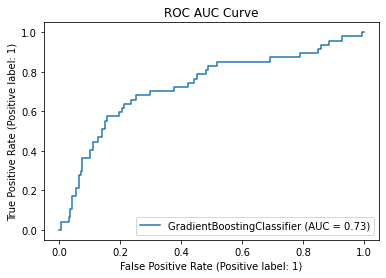

In [87]:
# ROC AUC Curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [88]:
# Saving Model

import joblib


joblib.dump(grid.best_estimator_,"Auto_insurance.pkl")

['Auto_insurance.pkl']